# Titanic Machine Learning from Disaster

### VARIABLE DESCRIPTIONS:
    survival        Survival
                    (0 = No; 1 = Yes)
    pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    name            Name
    sex             Sex
    age             Age
    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    ticket          Ticket Number
    fare            Passenger Fare
    cabin           Cabin
    embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import patsy
%matplotlib inline

In [43]:
train = pd.read_csv('train.csv')

## Data Explore

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 - 인원 : 891 명
 - 변수 : 12개 

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [46]:
#train["Survived"] = train.Survived.map({0: "no", 1: "yes"})  # 데이터를 0:no 1:Yes

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 사망자 vs 생존자 

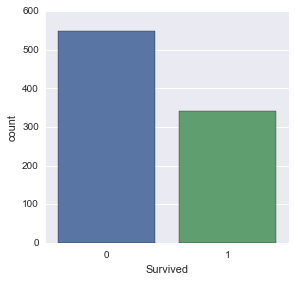

In [48]:
sns.factorplot('Survived',kind='count',data=train) # 사망자가 더 많다.

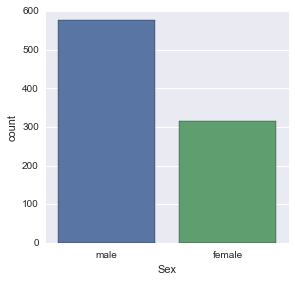

In [49]:
sns.factorplot('Sex', kind='count', data=train)  # 남성의 비율이 높다.

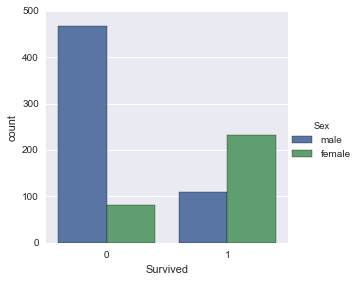

In [50]:
sns.factorplot('Survived', kind='count', hue='Sex', data=train)  # 여성의 생존 비율이 높다. 이유는 보통 여성과 어린아이 부터 구조.

In [51]:
pd.unique(train.Pclass)

array([3, 1, 2], dtype=int64)

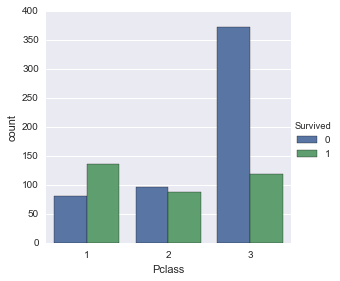

In [52]:
sns.factorplot('Pclass', kind='count', hue='Survived', order=[1,2,3], data=train)    #  3번 Class가 죽은 사람의 수가 많다. 

In [53]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [54]:
train['person'] = train[['Age','Sex']].apply(male_female_child, axis=1) # 1개의 로우씩 데이터를 입력하여 처리 apply(함수,margin=1,2)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [55]:
pd.unique(train.person)

array(['male', 'female', 'child'], dtype=object)

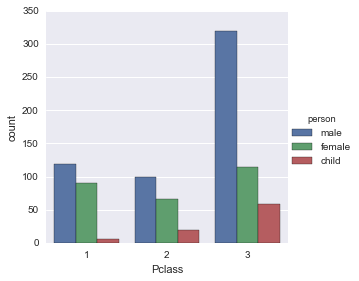

In [56]:
sns.factorplot('Pclass', kind='count', hue='person', order=[1,2,3], data=train) 
# 3번 객실에 남자 승객이 많다. 즉, 앞선 결과와 마찬가지로 사망자 순이 3번 객실, 여자보다 남자, 즉, 3번객실의 남자는 대부분 죽었을 가능성이 있다.

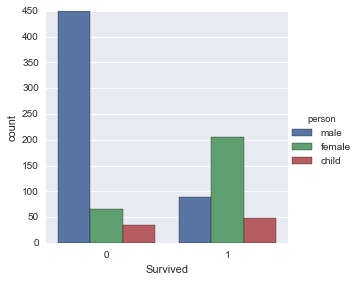

In [57]:
sns.factorplot('Survived', kind='count', hue='person', data=train) 

 - Dock Level

In [58]:
deck = train['Cabin'].dropna()  # R에서 rm.na = T와 동일한 문장. 
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [59]:
levels = []
for level in deck:
    levels.append(level[0]) # 리스트로 만들어버리면 문자열은 "C","8","5" 이런형태로 만들어져서 앞글자만 가지고 올 수있도록 

In [60]:
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


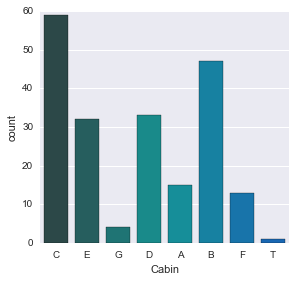

In [61]:
sns.factorplot('Cabin', kind='count', data=cabin_df, palette='winter_d')

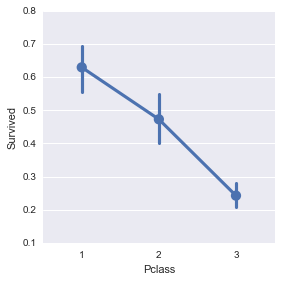

In [63]:
sns.factorplot('Pclass','Survived',data=train, order=[1,2,3])  # 독립변수  Pclass , 종속 변수 Survived 3번Class로 갈수록 생존 확률이 적다.

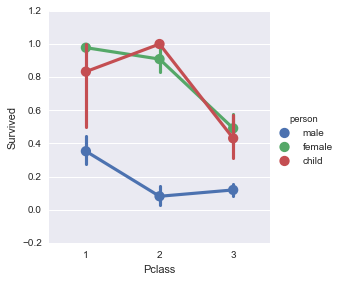

In [67]:
sns.factorplot('Pclass','Survived',data=train, hue='person', order=[1,2,3])   # 여성과 어린이일 수록 생존 확률이 높고, Class가 1로 갈수록 높다. 

### 나이에 따른 생존률 

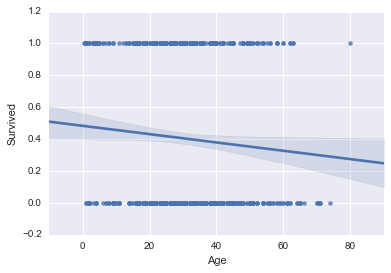

In [68]:
sns.regplot('Age','Survived',data=train)

### 나이, 좌석 등급에 따른 생존률 

In [71]:
train.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

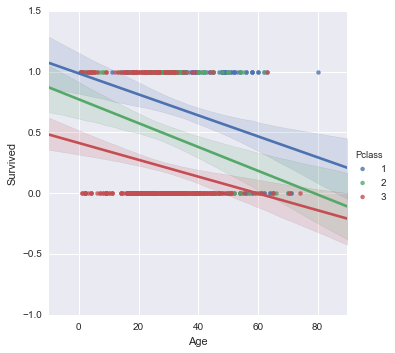

In [73]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=train)

### 나이, 성별에 따른 생존률 

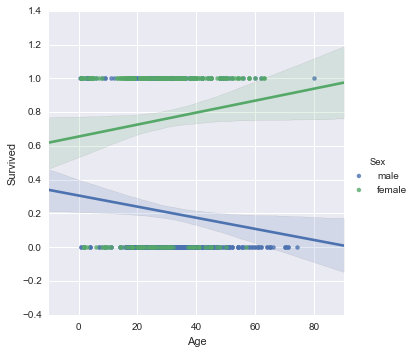

In [72]:
sns.lmplot('Age', 'Survived', hue='Sex', data=train)

# 생존률 예측 Machine Learning 

### Data Handling 

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [78]:
train.Cabin = train.Cabin.fillna(0)

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,male


In [81]:
from collections import Counter

In [82]:
cnt = Counter(train.Ticket)

In [83]:
cnt.most_common(10) # 개별 티켓이 아닌것 같군.

[('347082', 7),
 ('CA. 2343', 7),
 ('1601', 7),
 ('347088', 6),
 ('3101295', 6),
 ('CA 2144', 6),
 ('S.O.C. 14879', 5),
 ('382652', 5),
 ('113781', 4),
 ('4133', 4)]

### Choose Data 

In [137]:
col = train.columns.difference(['PassengerId','Name','Cabin','Survived'])
col

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Ticket',
       'person'],
      dtype='object')

In [138]:
train_re = train[col]

In [139]:
train_re.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Ticket,person
0,22.0,S,7.2500,0,3,male,1,A/5 21171,male
1,38.0,C,71.2833,0,1,female,1,PC 17599,female
2,26.0,S,7.9250,0,3,female,0,STON/O2. 3101282,female
3,35.0,S,53.1000,0,1,female,1,113803,female
4,35.0,S,8.0500,0,3,male,0,373450,male


In [164]:
y_train = train.Survived.astype('object')

In [152]:
train_re['SibSp'] = train_re.SibSp.astype('object') # 명목 변수로 변경 

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### 나이가 없는 경우가 있다. 
 - 평균 각 성별에 맞는 평균 나이로 대체 

In [142]:
import math

In [143]:
mean_male_age = round(train.Age[train.Sex=="male"].mean())
mean_female_age = round(train.Age[train.Sex=="female"].mean())

In [144]:
def Mean_Sex_Age(passenger):
    age, sex = passenger
    if math.isnan(age):
        if sex == "male":
            return mean_male_age
        else:
            return mean_female_age
    else:
        return age

In [145]:
train_re['Age'] = train_re[['Age','Sex']].apply(Mean_Sex_Age, axis=1) # 1개의 로우씩 데이터를 입력하여 처리 apply(함수,margin=1,2)
train_re.head()

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Ticket,person
0,22.0,S,7.2500,0,3,male,1,A/5 21171,male
1,38.0,C,71.2833,0,1,female,1,PC 17599,female
2,26.0,S,7.9250,0,3,female,0,STON/O2. 3101282,female
3,35.0,S,53.1000,0,1,female,1,113803,female
4,35.0,S,8.0500,0,3,male,0,373450,male


In [146]:
Embarked_cnt = Counter(train_re.Embarked) # 가장 많은 S를 넣는다. 
Embarked_cnt

Counter({nan: 2, 'S': 644, 'Q': 77, 'C': 168})

In [147]:
train_re.Embarked = train_re.Embarked.fillna('S')

C:\Anaconda3\envs\py35\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [153]:
train_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Age         891 non-null float64
Embarked    891 non-null object
Fare        891 non-null float64
Parch       891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null object
Ticket      891 non-null object
person      891 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 45.3+ KB


In [154]:
indep = train_re.columns

In [155]:
discrete = []
continuous = []
for v in indep:
    if train_re[v].dtype == 'object':
        discrete.append(v)
    else:
        continuous.append(v)

In [156]:
continuous

['Age', 'Fare', 'Parch', 'Pclass']

In [157]:
discrete

['Embarked', 'Sex', 'SibSp', 'Ticket', 'person']

In [163]:
dummy = pd.get_dummies(train_re[discrete])
X_train = pd.concat([train_re[continuous], dummy], axis=1)

In [159]:
X_train.head()

,Age,Fare,Parch,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,SibSp_0,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,person_child,person_female,person_male
0,22.0,7.2500,0,3,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38.0,71.2833,0,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26.0,7.9250,0,3,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,35.0,53.1000,0,1,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,8.0500,0,3,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [165]:
y_train[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: object

## 데이터 분할 

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [182]:
def getResult(y_test,y_pred):
    print(metrics.confusion_matrix(y_test, y_pred))
    print('accurracy:', metrics.accuracy_score(y_test, y_pred))
    print('precision:', metrics.precision_score(y_test, y_pred, pos_label='1'))
    print('recall:', metrics.recall_score(y_test, y_pred, pos_label='1'))
    print('f1:', metrics.f1_score(y_test, y_pred, pos_label='1'))

In [185]:
LR = LogisticRegression(penalty='l1',C=1)

In [187]:
LR.fit(X_train,y_train)

ValueError: Unknown label type: 'unknown'

In [ ]:
y_ridge = LR.predict(X_test)

## TestData (No Survived)

In [167]:
test = pd.read_csv('test.csv')

In [169]:
test['person'] = test[['Age','Sex']].apply(male_female_child, axis=1) # 1개의 로우씩 데이터를 입력하여 처리 apply(함수,margin=1,2)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female


In [170]:
test_re = test[col]

In [173]:
test_re['SibSp'] = test_re.SibSp.astype('object') # 명목 변수로 변경 

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [174]:
test_re.Embarked = test_re.Embarked.fillna('S')

C:\Anaconda3\envs\py35\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [175]:
test_re['Age'] = test_re[['Age','Sex']].apply(Mean_Sex_Age, axis=1) # 1개의 로우씩 데이터를 입력하여 처리 apply(함수,margin=1,2)

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [176]:
test_re.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Ticket,person
0,34.5,Q,7.8292,0,3,male,0,330911,male
1,47.0,S,7.0000,0,3,female,1,363272,female
2,62.0,Q,9.6875,0,2,male,0,240276,male
3,27.0,S,8.6625,0,3,male,0,315154,male
4,22.0,S,12.2875,1,3,female,1,3101298,female


In [177]:
dummy = pd.get_dummies(test_re[discrete])
X_test = pd.concat([test_re[continuous], dummy], axis=1)

In [178]:
X_test.head()

,Age,Fare,Parch,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,SibSp_0,...,Ticket_STON/O2. 3101270,Ticket_STON/OQ. 369943,Ticket_W./C. 14260,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734,person_child,person_female,person_male
0,34.5,7.8292,0,3,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,47.0,7.0000,0,3,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,62.0,9.6875,0,2,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,27.0,8.6625,0,3,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,12.2875,1,3,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
